In [1]:
# STEP 1: IMPORT THE PACKAGES

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# STEP 2: LOAD DATA “train.csv” WHILE ASSIGNING -1 AS NULL VALUES

train = pd.read_csv('/Users/sanket/Downloads/train.csv',na_values=-1)
train = train.drop(['id'], axis=1)
print('train.csv number of rows and columns:',train.shape)

train.csv number of rows and columns: (595212, 58)


The target variable is "target", which is 1 if a claim was filed, and 0 otherwise. Also, the variables ending with "cat" are categorical, and those ending with "bin" are binary as per Kaggle website.

In [3]:
# STEP 3: SEPARATE TARGET AND FEATUES VARIABLES

features = train.drop(['target'], axis=1).values
targets = train.target.values

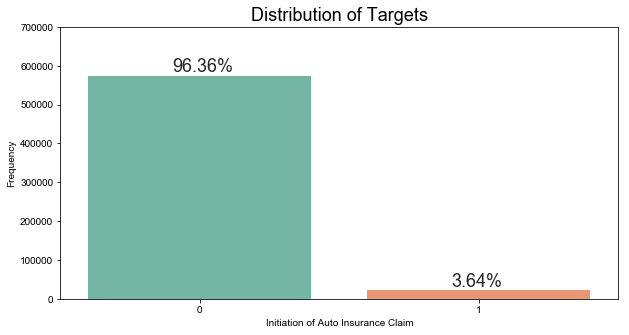

0    573518
1     21694
Name: target, dtype: int64

In [4]:
# STEP 4: EXPLORE “target” VARIABLE

targets = train.target.values
ax = sns.countplot(x = targets ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=700000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(targets)), (p.get_x()+ 0.3, p.get_height()+10000))
plt.title('Distribution of Targets')
plt.xlabel('Initiation of Auto Insurance Claim')
plt.ylabel('Frequency')
plt.show()
train['target'].value_counts()

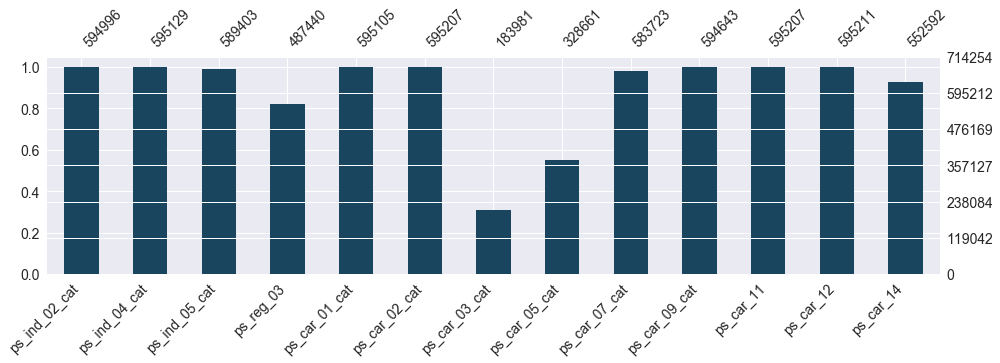

In [5]:
# STEP 5: DATA EXPLORATION AND ANALYSIS
# STEP 5a: Identify Missing Value Columns using BAR CHART

cols_missing_val_train = train.columns[train.isnull().any()].tolist()
msno.bar(train[cols_missing_val_train],figsize=(16,4),color="#19455e",fontsize=14,labels=True,)

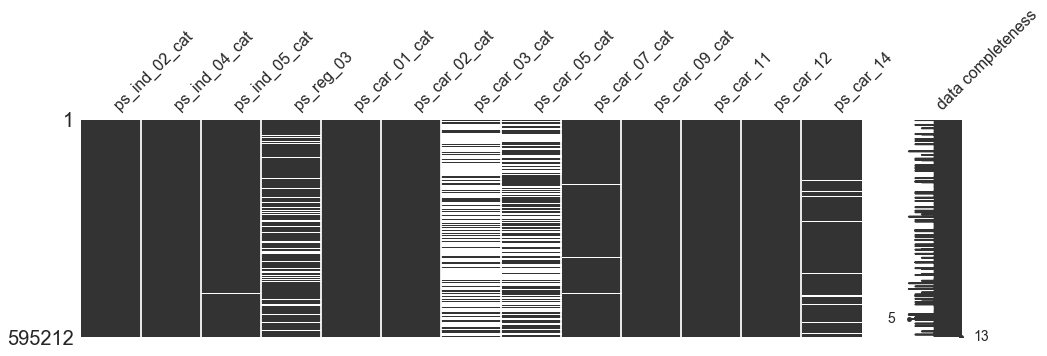

In [6]:
# STEP 5b: Identify Missing Value Columns using MATRIX

msno.matrix(train[cols_missing_val_train],width_ratios=(10,1),\
            figsize=(16,4),color=(0.2,0.2,0.2),fontsize=16,sparkline=True,labels=True)

In [7]:
# STEP 5c: Analyze Data using PANDAS_PROFILING

import pandas_profiling as pf

pf.ProfileReport(train)

Based on the observations from 3 steps on missing data identification, the following variables will be dropped 
(1)	ps_car_03_cat (69.1% missing values) 
(2)	ps_car_05_cat (44.8% missing values)
(3) ps_car_10_cat (99.2% data has only one values "1" out of "0", "1", "2")
(4)	ps_ind_10_bin (100% zeros, highly skewed)
(5)	ps_ind_11_bin (99.8% zeros, highly skewed)
(6) ps_ind_12_bin (99.1% ZEROS)
(7)	ps_ind_13_bin (99.9% zeros, highly skewed)
(8) ps_ind_14 (98.9% zeros)

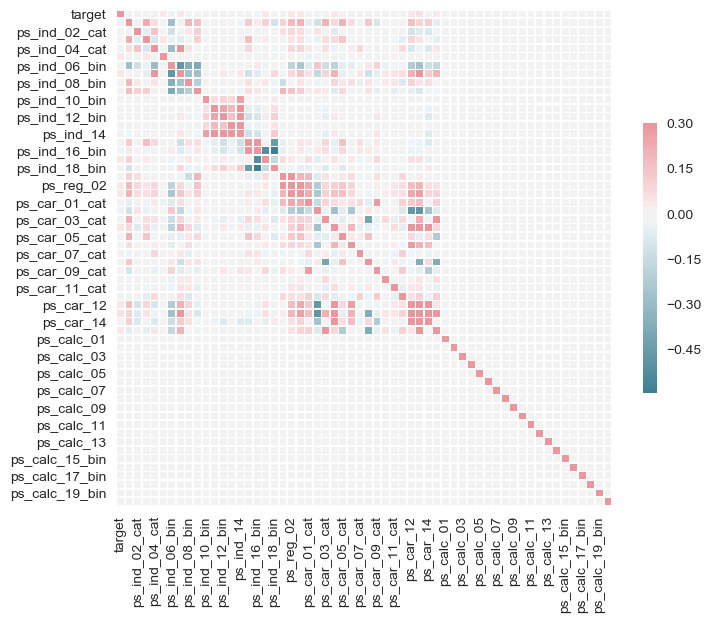

In [16]:
# STEP 5d: Analyze Data using CORRELLATION PLOT

sns.set(style="white")

# Compute the correlation matrix
corr = train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

As per the above correlation matrix, we should drop all "_calc" columns